# Step 01: Load lib modules

In [87]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
import time
import pickle
import numpy as np

%matplotlib inline 
import scipy.io.wavfile  
from sklearn.manifold import TSNE

# Step 02: Load CIFAR-100 dataset

In [88]:
#download https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
#Directories 
cifar_dataset_train_dir = "./datasets/dataset_cifar-100/train"
cifar_dataset_test_dir = "./datasets/dataset_cifar-100/test"
cifar_dataset_label_dir = "./datasets/dataset_cifar-100/meta"
#Load Training Set
cifar_dataset_train = open(cifar_dataset_train_dir, 'rb')
cifar_dataset_train = pickle.load(cifar_dataset_train, encoding='bytes')
#Load Testing Set
cifar_dataset_test = open(cifar_dataset_test_dir, 'rb')
cifar_dataset_test = pickle.load(cifar_dataset_test, encoding='bytes')
#Load Labels
cifar_dataset_label = open(cifar_dataset_label_dir, 'rb')
cifar_dataset_label = pickle.load(cifar_dataset_label, encoding='bytes')

# Step 03: Check data content

> Dataset Labels (Super Class: coarse, Sub Class: fine)

In [89]:
for keys in cifar_dataset_label:
    print(keys)

b'coarse_label_names'
b'fine_label_names'


> Super Class Labels

In [90]:
cifar_dataset_label.get(b'coarse_label_names')

[b'aquatic_mammals',
 b'fish',
 b'flowers',
 b'food_containers',
 b'fruit_and_vegetables',
 b'household_electrical_devices',
 b'household_furniture',
 b'insects',
 b'large_carnivores',
 b'large_man-made_outdoor_things',
 b'large_natural_outdoor_scenes',
 b'large_omnivores_and_herbivores',
 b'medium_mammals',
 b'non-insect_invertebrates',
 b'people',
 b'reptiles',
 b'small_mammals',
 b'trees',
 b'vehicles_1',
 b'vehicles_2']

> Sub Class Labels

In [91]:
print("Number of Labels: ",len(cifar_dataset_label.get(b'fine_label_names')))

Number of Labels:  100


# Step 04: Visualize, Encode and Load to List

> Dictionary Keys (for both train and test set) 

In [92]:
for keys in cifar_dataset_train:
    print(keys)

b'data'
b'batch_label'
b'filenames'
b'coarse_labels'
b'fine_labels'


> Visualize Sample Train data

Batch Label:  116
File Name:  b'bos_taurus_s_000507.png'
11
b'large_omnivores_and_herbivores'
19
b'cattle'


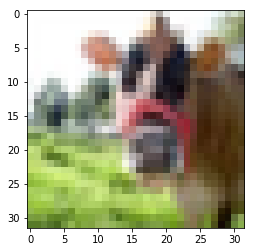

In [93]:
indx = 0
##Reshaping
data = cifar_dataset_train.get(b'data')[indx].reshape(3, 1024).T
colored_image = data.reshape(32,32,3)
#show Image
plt.imshow(colored_image)
#Print Batch Label
print("Batch Label: ",cifar_dataset_train.get(b'batch_label')[indx])
#Print File Name
print("File Name: ",cifar_dataset_train.get(b'filenames')[indx])
#Print Super Class Name
print(cifar_dataset_train.get(b'coarse_labels')[indx])
print(cifar_dataset_label.get(b'coarse_label_names')[cifar_dataset_train.get(b'coarse_labels')[indx]])
#Print SubClass Name
print(cifar_dataset_train.get(b'fine_labels')[indx])
print(cifar_dataset_label.get(b'fine_label_names')[cifar_dataset_train.get(b'fine_labels')[indx]])

## Data Reshaping and Visualizing

In [94]:
def cifar_loaditems(set_idx, item_idx):
    if (set_idx == 0): #Training set
        #get row of data
        data = cifar_dataset_train.get(b'data')[item_idx]
        #Super Class Name indx and lable
        super_class_idx = cifar_dataset_train.get(b'coarse_labels')[item_idx]
        super_class_lbl = cifar_dataset_label.get(b'coarse_label_names')[cifar_dataset_train.get(b'coarse_labels')[item_idx]]
        #SubClass Name indx and lable
        sub_class_idx = cifar_dataset_train.get(b'fine_labels')[item_idx]
        sub_class_lbl = cifar_dataset_label.get(b'fine_label_names')[cifar_dataset_train.get(b'fine_labels')[item_idx]]
    elif (set_idx == 1): #Testing set
        #get row of data
        data = cifar_dataset_test.get(b'data')[indx]
        #Super Class Name indx and lable
        super_class_idx = cifar_dataset_test.get(b'coarse_labels')[indx]
        super_class_lbl = cifar_dataset_label.get(b'coarse_label_names')[cifar_dataset_test.get(b'coarse_labels')[indx]]
        #SubClass Name indx and lable
        sub_class_idx = cifar_dataset_test.get(b'fine_labels')[indx]
        sub_class_lbl = cifar_dataset_label.get(b'fine_label_names')[cifar_dataset_test.get(b'fine_labels')[indx]]

    return data, super_class_idx, super_class_lbl, sub_class_idx, sub_class_lbl 

In [95]:
def load_data():
    x_train, y_train = [],[]
    x_test, y_test = [],[]
    nb_classes = 100
    
    
    for i in range(len(cifar_dataset_train.get(b'data'))):
        colored_image, _, _, sub_class_idx, _ = cifar_loaditems(0, i)
        x_train.append(colored_image)
        y_train.append(sub_class_idx)
    
    
    targets = np.array([y_train]).reshape(-1)
    y_train = np.eye(nb_classes)[targets]
        
    for i in range(len(cifar_dataset_test.get(b'data'))):
        colored_image, _, _, sub_class_idx, _ = cifar_loaditems(1, i) 
        x_test.append(colored_image)
        y_test.append(sub_class_idx)
        
    
    targets = np.array([y_test]).reshape(-1)
    y_test = np.eye(nb_classes)[targets]
        
    return (x_train, y_train), (x_test, y_test)
    

In [96]:
(x_train, y_train), (x_test, y_test) = load_data()

In [97]:
x_train[0], x_train[0].shape, y_train[0], y_train[0].shape, len(x_train)

(array([255, 255, 255, ...,  10,  59,  79], dtype=uint8),
 (3072,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (100,),
 50000)

In [98]:
x_test[0], x_test[0].shape, y_test[0], y_test[0].shape, len(x_test)

(array([199, 196, 195, ..., 215, 211, 183], dtype=uint8),
 (3072,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 (100,),
 10000)

# CNN Model

### Parameters 

In [99]:
#Parameters
inputsize = 32
channels = 3
output = 100
training_epochs = 100
learning_rate = 0.01
num_epochs = 100
batch_size = 32

In [100]:
# Placeholder variable for the input images
x = tf.placeholder(tf.float32, shape=[None,inputsize*inputsize*channels])
x_image = tf.reshape(x, [-1, inputsize, inputsize, channels])

# Placeholder variable for the true labels associated with the images
y_true = tf.placeholder(tf.float32, shape=[None,100])
y_true_cls = tf.argmax(y_true, dimension=1)


In [101]:
def new_conv_layer(input, num_input_channels, filter_size, num_filters, name):
    
    with tf.variable_scope(name) as scope:
        # Shape of the filter-weights for the convolution
        shape = [filter_size, filter_size, num_input_channels, num_filters]
        # Create new weights (filters) with the given shape
        weights = tf.Variable(tf.truncated_normal(shape, stddev=0.05))
        # Create new biases, one for each filter
        biases = tf.Variable(tf.constant(0.05, shape=[num_filters]))
        # TensorFlow operation for convolution
        layer = tf.nn.conv2d(input=input, filter=weights, strides=[1, 1, 1, 1], padding='SAME')
        # Add the biases to the results of the convolution.
        layer += biases
        return layer, weights

In [102]:
def new_pool_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.max_pool(value=input, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
        
        return layer

In [103]:
def new_relu_layer(input, name):
    
    with tf.variable_scope(name) as scope:
        # TensorFlow operation for convolution
        layer = tf.nn.relu(input)
        
        return layer

In [104]:
def new_fc_layer(input, num_inputs, num_outputs, name):
    
    with tf.variable_scope(name) as scope:

        # Create new weights and biases.
        weights = tf.Variable(tf.truncated_normal([num_inputs, num_outputs], stddev=0.05))
        biases = tf.Variable(tf.constant(0.05, shape=[num_outputs]))
        
        # Multiply the input and weights, and then add the bias-values.
        layer = tf.matmul(input, weights) + biases
        
        return layer , weights

In [105]:
# Convolutional Layer 1
layer_conv1, weights_conv1 = new_conv_layer(input=x_image, num_input_channels=3,
                                            filter_size=3, num_filters=15, name ="conv1")
# Pooling Layer 1
layer_pool1 = new_pool_layer(layer_conv1, name="pool1")
# RelU layer 1
layer_relu1 = new_relu_layer(layer_pool1, name="relu1") 


# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu1, num_input_channels=15,
                                            filter_size=3, num_filters=16, name= "conv2")
# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2, name="pool2")
# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2, name="relu2")

# Convolutional Layer 2
layer_conv2, weights_conv2 = new_conv_layer(input=layer_relu2, num_input_channels=16,
                                            filter_size=3, num_filters=26, name= "conv2")
# Pooling Layer 2
layer_pool2 = new_pool_layer(layer_conv2, name="pool2")
# RelU layer 2
layer_relu2 = new_relu_layer(layer_pool2, name="relu2")


# Flatten Layer
num_features = layer_relu1.get_shape()[1:4].num_elements()
layer_flat = tf.reshape(layer_relu1, [-1, num_features])

# Fully-Connected Layer 1
layer_fc1, w_fc1 = new_fc_layer(layer_flat, num_inputs=num_features, num_outputs=128, name="fc1")
layer_relu3 = new_relu_layer(layer_fc1, name="relu3")

layer_fc2, w_fc2 = new_fc_layer(layer_relu3, num_inputs=128, num_outputs=512, name="fc2")
layer_relu4 = new_relu_layer(layer_fc2, name="relu4")

# Fully-Connected Layer 2
layer_fc3, w_fc3 = new_fc_layer(input=layer_relu4, num_inputs=512, num_outputs= 100, name="fc3")

In [106]:

# Use Softmax function to normalize the output
with tf.variable_scope("Softmax"):
    y_pred = tf.nn.softmax(layer_fc3)
    y_pred_cls = tf.argmax(y_pred, dimension=1)

In [107]:

# Use Cross entropy cost function
with tf.name_scope("cross_ent"):
    cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=layer_fc3, labels=y_true)
    cost = tf.reduce_mean(cross_entropy)

In [108]:

# Use Adam Optimizer
with tf.name_scope("optimizer"):
    optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [109]:
# Accuracy
with tf.name_scope("accuracy"):
    correct_prediction = tf.equal(y_pred_cls, y_true_cls)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [110]:

# Initialize the FileWriter
writer = tf.summary.FileWriter("Training_FileWriter/")
writer1 = tf.summary.FileWriter("Validation_FileWriter/")

In [111]:

# Add the cost and accuracy to summary
tf.summary.scalar('loss', cost)
tf.summary.scalar('accuracy', accuracy)

# Merge all summaries together
merged_summary = tf.summary.merge_all()

In [112]:
num_epochs = 5
batch_size = 32
finalRepresentations = []

In [114]:
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    # Add the model graph to TensorBoard
    writer.add_graph(sess.graph)
    
    # Loop over number of epochs
    for epoch in range(num_epochs):
        
        start_time = time.time()
        train_accuracy = 0
        
        batch_increamenter = 0
        for batch in range(0, int(50000/batch_size)):
            
            # Get a batch of images and labels
            x_batch, y_true_batch = x_train [batch*batch_size:batch*batch_size+batch_size] ,\
                                    y_train [batch*batch_size:batch*batch_size+batch_size]
            #targets = np.array([y_true_batch]).reshape(-1)
            #y_true_batch = np.eye(2)[targets]
            
            # Put the batch into a dict with the proper names for placeholder variables
            feed_dict_train = {x: x_batch, y_true: y_true_batch}
            
            # Run the optimizer using this batch of training data.
            opt = sess.run(optimizer, feed_dict=feed_dict_train)

            # Calculate the accuracy on the batch of training data
            #train_accuracy += sess.run(accuracy, feed_dict=feed_dict_train)
            
            loss, acc = sess.run([cost, accuracy], feed_dict=feed_dict_train)
                    
            finalRepresentations.append(layer_fc3.eval(session=sess, feed_dict={x:x_test}))

            # Generate summary with the current batch of data and write to file
            #summ = sess.run(merged_summary, feed_dict=feed_dict_train)
            
            #writer.add_summary(summ, epoch*int(50000/batch_size) + batch)
            
            batch_increamenter += 32
        
        #train_accuracy /= int(50000/batch_size)
        print("Iter " + str(epoch) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        # Generate summary and validate the model on the entire validation set
        #print(accuracy)
        #summ, vali_accuracy = sess.run([merged_summary, accuracy], feed_dict={x:x_test, y_true:y_test})
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x:x_test, y_true:y_test})
        #writer1.add_summary(summ, epoch)

        end_time = time.time()
        print("Testing Accuracy:","{:.5f}".format(test_acc))
        '''
        print("Epoch "+str(epoch+1)+" completed : Time usage "+str(int(end_time-start_time))+" seconds")
        print("\tAccuracy:")
        print ("\t- Training Accuracy:\t{0:.15f}".format(train_accuracy))
        print ("\t- Validation Accuracy:\t{0:.15f}".format(vali_accuracy))
        '''
        

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/mgd-pc/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-114-9b57cfcae814>", line 33, in <module>
    finalRepresentations.append(layer_fc3.eval(session=sess, feed_dict={x:x_test}))
  File "/home/mgd-pc/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 710, in eval
    return _eval_using_default_session(self, feed_dict, self.graph, session)
  File "/home/mgd-pc/.local/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 5180, in _eval_using_default_session
    return session.run(tensors, feed_dict)
  File "/home/mgd-pc/.local/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 900, in run
    run_metadata_ptr)
  File "/home/mgd-pc/.local/lib/python3.5/site-packages/tensorflow/python/client/session.py", line 1135, in _run
    feed_dict_tensor, options, run_me

KeyboardInterrupt: 

In [76]:
y_test[0] , y_test[1]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [45]:
testY = np.argmax(y_test,1)

In [79]:
with tf.Session() as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
    
    finalWs = w_fc3.eval(session=sess)

In [80]:
finalWs

array([[-0.0185761 ,  0.01073484, -0.01115475, ..., -0.04213686,
         0.01272609,  0.01810141],
       [-0.01783766,  0.05527231,  0.03174054, ...,  0.01085515,
        -0.02038305, -0.02443215],
       [ 0.08909698, -0.06816155,  0.03369952, ...,  0.03263411,
        -0.01210842, -0.05071253],
       ...,
       [-0.04095953,  0.03151746,  0.05138552, ..., -0.05310227,
        -0.00199248, -0.09159435],
       [-0.07287268,  0.01885913,  0.04408858, ...,  0.08542561,
        -0.03071624, -0.04785557],
       [ 0.00595636,  0.05896852, -0.04212232, ...,  0.02742238,
         0.0443393 , -0.05137293]], dtype=float32)

In [81]:
def plot_with_labels(lowDWeights, labels, filename='tsne.png'):
    assert lowDWeights.shape[0] >= len(labels), "More labels than weights"
    plt.figure(figsize=(20, 20))  #in inches
    for i, label in enumerate(labels):
        x, y = lowDWeights[i,:]
        plt.scatter(x, y)
        plt.annotate(label,
                 xy=(x, y),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

    plt.savefig(filename)

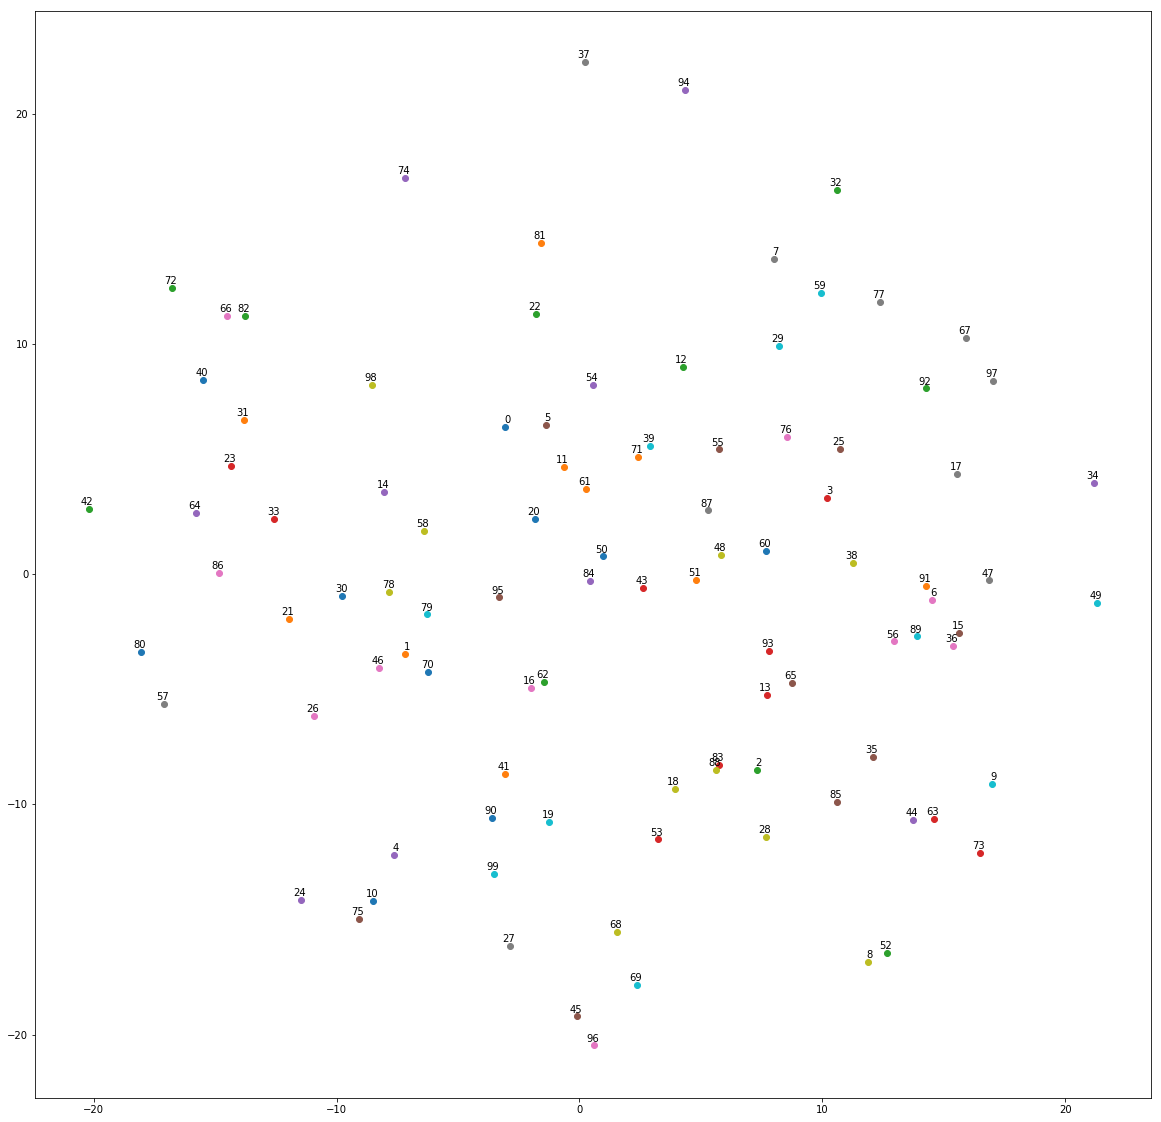

In [85]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
plot_only = 6
lowDWeights = tsne.fit_transform(finalWs)
labels = [i for i in range(0,100)]
plot_with_labels(lowDWeights, labels)

In [86]:
iters = 0
for i in finalRepresentations:
    tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=5000)
    plot_only = 2000
    lowDWeights = tsne.fit_transform(i[0:plot_only,:])
    labels = testY[0:plot_only]
    plot_with_labels(lowDWeights, labels, str(iters*100)+'.png')
    iters+=1

NameError: name 'finalRepresentations' is not defined

In [ ]:
#save_path = saver.save(sess, "./my_fashion_model")

In [ ]:
'''
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import dataset
import random

# Define parameters
FLAGS = tf.app.flags.FLAGS
tf.app.flags.DEFINE_float('learning_rate', 0.00003, 'Initial learning rate.')
tf.app.flags.DEFINE_integer('steps_to_validate', 1000,
                            'Steps to validate and print loss')

# For distributed
tf.app.flags.DEFINE_string("ps_hosts", "",
                           "Comma-separated list of hostname:port pairs")
tf.app.flags.DEFINE_string("worker_hosts", "",
                           "Comma-separated list of hostname:port pairs")
tf.app.flags.DEFINE_string("job_name", "", "One of 'ps', 'worker'")
tf.app.flags.DEFINE_integer("task_index", 0, "Index of task within the job")
tf.app.flags.DEFINE_integer("issync", 0, "issync mode")

# Convolutional Layer 1.
filter_size1 = 3
num_filters1 = 32

# Convolutional Layer 2.
filter_size2 = 3
num_filters2 = 32

# Convolutional Layer 3.
filter_size3 = 3
num_filters3 = 64

# Fully-connected layer.
fc_size = 128             # Number of neurons in fully-connected layer.

# Number of color channels for the images: 1 channel for gray-scale.
num_channels = 3

# image dimensions (only squares for now)
img_size = 128

# Size of image when flattened to a single dimension
img_size_flat = img_size * img_size * num_channels

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# class info
classes = ['dog', 'cat']
num_classes = len(classes)

# batch size
batch_size = 128 

# validation split
validation_size = .2

# how long to wait after validation loss stops improving before
# terminating training
early_stopping = None  # use None if you don't want to implement early stoping

train_path = './cat_dog/train'
test_path = './cat_dog/test1'
checkpoint_dir = "."

data = dataset.read_train_sets(
    train_path,
    img_size,
    classes,
     validation_size=validation_size)
test_images, test_ids = dataset.read_test_set(test_path, img_size)
# Counter for total number of iterations performed so far.
total_iterations = 0


print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(test_images)))
print("- Validation-set:\t{}".format(len(data.valid.labels)))


def new_weights(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.05))


def new_biases(length):
    return tf.Variable(tf.constant(0.05, shape=[length]))


def new_conv_layer(input,              # The previous layer.
                   num_input_channels,  # Num. channels in prev. layer.
                   filter_size,        # Width and height of each filter.
                   num_filters,        # Number of filters.
                   use_pooling=True):  # Use 2x2 max-pooling.

    # Shape of the filter-weights for the convolution.
    # This format is determined by the TensorFlow API.
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new weights aka. filters with the given shape.
    weights = new_weights(shape=shape)

    # Create new biases, one for each filter.
    biases = new_biases(length=num_filters)

    # Create the TensorFlow operation for convolution.
    # Note the strides are set to 1 in all dimensions.
    # The first and last stride must always be 1,
    # because the first is for the image-number and
    # the last is for the input-channel.
    # But e.g. strides=[1, 2, 2, 1] would mean that the filter
    # is moved 2 pixels across the x- and y-axis of the image.
    # The padding is set to 'SAME' which means the input image
    # is padded with zeroes so the size of the output is the same.
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME')

    # Add the biases to the results of the convolution.
    # A bias-value is added to each filter-channel.
    layer += biases

    # Use pooling to down-sample the image resolution?
    if use_pooling:
        # This is 2x2 max-pooling, which means that we
        # consider 2x2 windows and select the largest value
        # in each window. Then we move 2 pixels to the next window.
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Rectified Linear Unit (ReLU).
    # It calculates max(x, 0) for each input pixel x.
    # This adds some non-linearity to the formula and allows us
    # to learn more complicated functions.
    layer = tf.nn.relu(layer)

    # Note that ReLU is normally executed before the pooling,
    # but since relu(max_pool(x)) == max_pool(relu(x)) we can
    # save 75% of the relu-operations by max-pooling first.

    # We return both the resulting layer and the filter-weights
    # because we will plot the weights later.
    return layer, weights


def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The shape of the input layer is assumed to be:
    # layer_shape == [num_images, img_height, img_width, num_channels]

    # The number of features is: img_height * img_width * num_channels
    # We can use a function from TensorFlow to calculate this.
    num_features = layer_shape[1:4].num_elements()

    # Reshape the layer to [num_images, num_features].
    # Note that we just set the size of the second dimension
    # to num_features and the size of the first dimension to -1
    # which means the size in that dimension is calculated
    # so the total size of the tensor is unchanged from the reshaping.
    layer_flat = tf.reshape(layer, [-1, num_features])

    # The shape of the flattened layer is now:
    # [num_images, img_height * img_width * num_channels]

    # Return both the flattened layer and the number of features.
    return layer_flat, num_features


def new_fc_layer(input,          # The previous layer.
                 num_inputs,     # Num. inputs from prev. layer.
                 num_outputs,    # Num. outputs.
                 use_relu=True):  # Use Rectified Linear Unit (ReLU)?

    # Create new weights and biases.
    weights = new_weights(shape=[num_inputs, num_outputs])
    biases = new_biases(length=num_outputs)

    # Calculate the layer as the matrix multiplication of
    # the input and weights, and then add the bias-values.
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if use_relu:
        layer = tf.nn.relu(layer)

    return layer


def main(_):
    ps_hosts = FLAGS.ps_hosts.split(",")
    worker_hosts = FLAGS.worker_hosts.split(",")
    cluster = tf.train.ClusterSpec({"ps": ps_hosts, "worker": worker_hosts})
    server = tf.train.Server(
        cluster,
        job_name=FLAGS.job_name,
     task_index=FLAGS.task_index)

    if FLAGS.job_name == "ps":
        server.join()
    elif FLAGS.job_name == "worker":
        with tf.device(tf.train.replica_device_setter(
                        worker_device="/job:worker/task:%d" % FLAGS.task_index,
                        cluster=cluster)):

            global_step = tf.Variable(0, name='global_step', trainable=False)
            x = tf.placeholder(
                tf.float32, shape=[
                    None, img_size_flat], name='x')
            x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])
            y_true = tf.placeholder(
                tf.float32, shape=[
                    None, num_classes], name='y_true')
            y_true_cls = tf.argmax(y_true, dimension=1)

            layer_conv1, weights_conv1 = \
                new_conv_layer(input=x_image,
                               num_input_channels=num_channels,
                               filter_size=filter_size1,
                               num_filters=num_filters1,
                               use_pooling=True)

            layer_conv2, weights_conv2 = \
                new_conv_layer(input=layer_conv1,
                               num_input_channels=num_filters1,
                               filter_size=filter_size2,
                               num_filters=num_filters2,
                               use_pooling=True)

            layer_conv3, weights_conv3 = \
                new_conv_layer(input=layer_conv2,
                               num_input_channels=num_filters2,
                               filter_size=filter_size3,
                               num_filters=num_filters3,
                               use_pooling=True)

            layer_flat, num_features = flatten_layer(layer_conv3)

            layer_fc1 = new_fc_layer(input=layer_flat,
                                     num_inputs=num_features,
                                     num_outputs=fc_size,
                                     use_relu=True)
            layer_fc2 = new_fc_layer(input=layer_fc1,
                                     num_inputs=fc_size,
                                     num_outputs=num_classes,
                                     use_relu=False)
            y_pred = tf.nn.softmax(layer_fc2)
            y_pred_cls = tf.argmax(y_pred, dimension=1, name="y_pred_cls")
            cross_entropy = tf.nn.softmax_cross_entropy_with_logits( logits=layer_fc2, labels=y_true)
            cost = tf.reduce_mean(cross_entropy)
            #optimizer = tf.train.AdamOptimizer(
            #    learning_rate=1e-4).minimize(cost)
            optimizer = tf.train.AdamOptimizer(
                learning_rate=1e-4)
            grads_and_vars = optimizer.compute_gradients(cost)
            correct_prediction = tf.equal(y_pred_cls, y_true_cls)
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

            rep_op = tf.train.SyncReplicasOptimizer(optimizer,
                                                    replicas_to_aggregate=len(
                                                    worker_hosts),
                                                    #replica_id=FLAGS.task_index,
                                                    total_num_replicas=len(
                                                    worker_hosts),
                                                    use_locking=True)
            train_op = rep_op.apply_gradients(grads_and_vars,
                                        global_step=global_step)
            init_token_op = rep_op.get_init_tokens_op()
            chief_queue_runner = rep_op.get_chief_queue_runner()


            init_op = tf.initialize_all_variables()
            saver = tf.train.Saver()
            train_batch_size = batch_size

        sv = tf.train.Supervisor(is_chief=(FLAGS.task_index == 0),
                                    logdir="./checkpoint/",
                                    init_op=init_op,
                                    summary_op=None,
                                    saver=saver,
                                    global_step=global_step,
                                    save_model_secs=60)
        session = sv.prepare_or_wait_for_session(server.target)
        #session.run(tf.global_variables_initializer())

        sv.start_queue_runners(session, [chief_queue_runner])
        session.run(init_token_op)

    def print_progress(
        epoch,
        feed_dict_train,
        feed_dict_validate,
        val_loss,
     saver):
        # Calculate the accuracy on the training-set.
        acc = session.run(accuracy, feed_dict=feed_dict_train)
        val_acc = session.run(accuracy, feed_dict=feed_dict_validate)
        #val_acc_total = session.run(accuracy, feed_dict=feed_dict_validate_total)
        msg = "Epoch {0} --- Training Accuracy: {1:>6.1%}, Validation Accuracy: {2:>6.1%}, Validation Loss: {3:.3f}"
        #msg1 = "Epoch {0} --- Total test Accuracy: {1:>6.1%}"
        print(msg.format(epoch + 1, acc, val_acc, val_loss))
        #print(msg1.format(epoch + 1, val_acc_total))
        #saver.save(session, './backup.chk')

    def optimize(num_iterations, saver):
        # Ensure we update the global variable rather than a local copy.
        global total_iterations

        # Start-time used for printing time-usage below.
        start_time = time.time()

        best_val_loss = float("inf")
        patience = 0

        for i in range(total_iterations,
                       total_iterations + num_iterations):

            # Get a batch of training examples.
            # x_batch now holds a batch of images and
            # y_true_batch are the true labels for those images.
            x_batch, y_true_batch, _, cls_batch = data.train.next_batch(
                                                                        train_batch_size)
            x_valid_batch, y_valid_batch, _, valid_cls_batch = data.valid.next_batch(
                train_batch_size)

            # Convert shape from [num examples, rows, columns, depth]
            # to [num examples, flattened image shape]

            x_batch = x_batch.reshape(train_batch_size, img_size_flat)
            x_valid_batch = x_valid_batch.reshape(
                train_batch_size, img_size_flat)

            # Put the batch into a dict with the proper names
            # for placeholder variables in the TensorFlow graph.
            feed_dict_train = {x: x_batch,
                               y_true: y_true_batch}

            feed_dict_validate = {x: x_valid_batch,
                                  y_true: y_valid_batch}

            images_test_total = data.valid.images[:, :].reshape(
                data.valid.images[:, :].shape[0], img_size_flat)
            labels_total = data.valid.labels[:, :]
            # feed_dict_validate_total = {x: images_test_total,
            #			      y_true: labels_total}

            # Run the optimizer using this batch of training data.
            # TensorFlow assigns the variables in feed_dict_train
            # to the placeholder variables and then runs the optimizer.
            #session.run(optimizer, feed_dict=feed_dict_train)
            session.run([train_op, cost, global_step], feed_dict=feed_dict_train)

            # Print status at end of each epoch (defined as full pass through
            # training dataset).
            if i % int(data.train.num_examples/batch_size) == 0:
                val_loss = session.run(cost, feed_dict=feed_dict_validate)
                epoch = int(i / int(data.train.num_examples/batch_size))

                print_progress(
                    epoch,
                    feed_dict_train,
                    feed_dict_validate,
                    val_loss,
                    saver)
                # print_validation_accuracy()

                if early_stopping:
                    if val_loss < best_val_loss:
                        best_val_loss = val_loss
                        patience = 0
                    else:
                        patience += 1

                    if patience == early_stopping:
                        break

        # Update the total number of iterations performed.
        total_iterations += num_iterations

        # Ending time.
        end_time = time.time()

        # Difference between start and end-times.
        time_dif = end_time - start_time

        # Print the time-usage.
        print("Time elapsed: " + str(timedelta(seconds=int(round(time_dif)))))

    def plot_example_errors(cls_pred, correct):
        # cls_pred is an array of the predicted class-number for
        # all images in the test-set.

        # correct is a boolean array whether the predicted class
        # is equal to the true class for each image in the test-set.

        # Negate the boolean array.
        incorrect = (correct == False)

        # Get the images from the test-set that have been
        # incorrectly classified.
        images = data.valid.images[incorrect]

        # Get the predicted classes for those images.
        cls_pred = cls_pred[incorrect]

        # Get the true classes for those images.
        cls_true = data.valid.cls[incorrect]

        # Plot the first 9 images.
        plot_images(images=images[0:9],
                    cls_true=cls_true[0:9],
                    cls_pred=cls_pred[0:9])

    def plot_confusion_matrix(cls_pred):
        # cls_pred is an array of the predicted class-number for
        # all images in the test-set.

        # Get the true classifications for the test-set.
        cls_true = data.valid.cls

        # Get the confusion matrix using sklearn.
        cm = confusion_matrix(y_true=cls_true,
                              y_pred=cls_pred)

        # Print the confusion matrix as text.
        print(cm)

        # Plot the confusion matrix as an image.
        plt.matshow(cm)

        # Make various adjustments to the plot.
        plt.colorbar()
        tick_marks = np.arange(num_classes)
        plt.xticks(tick_marks, range(num_classes))
        plt.yticks(tick_marks, range(num_classes))
        plt.xlabel('Predicted')
        plt.ylabel('True')

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
        plt.show()

    #x_val = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x_val')
    #y_true_val = tf.placeholder(tf.float32, shape=[None, num_classes], name='y_true_val')

    def print_validation_accuracy(show_example_errors=False,
                                  show_confusion_matrix=False):

        #global x
        #global y_true
        #global session
        # Number of images in the test-set.
        num_test = len(data.valid.images)

        # Allocate an array for the predicted classes which
        # will be calculated in batches and filled into this array.
        cls_pred = np.zeros(shape=num_test, dtype=np.int)

        # Now calculate the predicted classes for the batches.
        # We will just iterate through all the batches.
        # There might be a more clever and Pythonic way of doing this.

        # The starting index for the next batch is denoted i.
        i = 0

        while i < num_test:
            # The ending index for the next batch is denoted j.
            j = min(i + batch_size, num_test)

            #import ipdb ; ipdb.set_trace()
            # Get the images from the test-set between index i and j.
            reshape_size = batch_size
            if data.valid.images[i:j, :].shape[0] < reshape_size:
                reshape_size = data.valid.images[i:j, :].shape[0]
            try:
                images = data.valid.images[
                    i: j, :].reshape(
                    reshape_size, img_size_flat)
            except:
                print i
                print j
                print data.valid.images[i:j, :].shape
                print batch_size
                print img_size_flat

            # Get the associated labels.
            labels = data.valid.labels[i:j, :]
            # Create a feed-dict with these images and labels.
            feed_dict = {x: images,
                         y_true: labels}

            # Calculate the predicted class using TensorFlow.
            cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

            # Set the start-index for the next batch to the
            # end-index of the current batch.
            i = j

        cls_true = np.array(data.valid.cls)
        cls_pred = np.array([classes[x] for x in cls_pred])

        # Create a boolean array whether each image is correctly classified.
        correct = (cls_true == cls_pred)

        # Calculate the number of correctly classified images.
        # When summing a boolean array, False means 0 and True means 1.
        correct_sum = correct.sum()

        # Classification accuracy is the number of correctly classified
        # images divided by the total number of images in the test-set.
        acc = float(correct_sum) / num_test

        # Print the accuracy.
        msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
        print(msg.format(acc, correct_sum, num_test))

        # Plot some examples of mis-classifications, if desired.
        if show_example_errors:
            print("Example errors:")
            plot_example_errors(cls_pred=cls_pred, correct=correct)

        # Plot the confusion matrix, if desired.
        if show_confusion_matrix:
            print("Confusion Matrix:")
            plot_confusion_matrix(cls_pred=cls_pred)

    optimize(num_iterations=10000, saver=saver)

    # print_validation_accuracy()

if __name__ == "__main__":
    tf.app.run()
    
'''

In [29]:
from tensorflow.examples.tutorials.mnist import input_data

In [30]:
data = input_data.read_data_sets('data/fashion',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [31]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=data.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=data.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=data.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=data.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [32]:
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

In [34]:
data.train.images[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)